<a href="https://colab.research.google.com/github/MarkovMarkowitz/MarkovMarkowitz/blob/main/Day_Trading_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [761]:
!pip3 install pyfolio
import pyfolio as pyf

**DAY TRADING STRATEGY**

# Notebook Instructions

1. If you are new to Jupyter notebooks, please go through this introductory manual <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank">here</a>.
1. Any changes made in this notebook would be lost after you close the browser window. **You can download the notebook to save your work on your PC.**
1. Before running this notebook on your local PC:<br>
i.  You need to set up a Python environment and the relevant packages on your local PC. To do so, go through the section on "**Run Codes Locally on Your Machine**" in the course.<br>
ii. You need to **download the zip file available in the last unit** of this course. The zip file contains the data files and/or python modules that might be required to run this notebook.

In [762]:
# For data manupulations

START = '2022-08-01'
END = '2023-08-01'

VOLATILITY_FACTOR = 0.45
LOOKBACK = 45

# VF    LB    PEAK_CUM  CUM_LAST
# 0.25  45    3.83       2.54
# 0.35  45    4.46       2.84
# 0.40  45    4.44       2.84
# 0.45  45    4.446      3.095   ******* best
# 0.45  55    3.91       2.5
# 0.45  25    2.51       1.66
# 0.45  65    4.05       2.59
# 0.45  90    4.3        2.7
# 0.50  45    4.34       3.02
# 0.55  45    3.84       2.67
# 1.00  45    3.76       2.62

import pandas as pd
import numpy as np
import yfinance as yf

# For plotting
import matplotlib.pyplot as plt

Ticker = "CANTE"
# Read data from Yahoo finance
TickerIS = Ticker + ".IS"
data = yf.download(TickerIS,START, END)

data_close = data['Adj Close']
# Convert index into datetime format
data.index = pd.to_datetime(data.index,format="%d-%m-%Y")

# Calculate adjustment factor
adjusted_factor = data['Adj Close'] / data['Close']

# Calculate adjusted open price
data['Adj Open'] = adjusted_factor * data['Open']

data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Adj Open
Date,,,,,,,
2023-07-25,19.00,19.000000,17.209999,17.209999,17.209999,152017549,19.00
2023-07-26,17.40,17.959999,15.900000,17.639999,17.639999,220580933,17.40
2023-07-27,17.40,19.400000,16.530001,18.700001,18.700001,328539386,17.40
2023-07-28,18.77,19.969999,18.450001,19.700001,19.700001,143406886,18.77
2023-07-31,20.00,21.639999,19.900000,21.540001,21.540001,113910433,20.00


In [763]:
# Calculate returns
data['returns'] = (data['Adj Open'] - data['Adj Close'].shift(1)) / data['Adj Close'].shift(1)

In [764]:
# Calculate standard deviation of returns
data['std'] = data['returns'].rolling(LOOKBACK).std()

In [765]:
data['positions'] = np.nan

In [766]:
# GAP UP-GAP DOWN STRATEGY

# Long entry condition
# long_entry = data['Adj Open'] > data['Adj Close'].shift(1)

# # Short entry condition
# short_entry = data['Adj Open'] < data['Adj Close'].shift(1)

In [767]:
# # IMPROVED STRATEGY

# Long entry condition
longs_entry = data['returns'] < VOLATILITY_FACTOR * data['std']

# Short entry condition
short_entry = data['returns'] > VOLATILITY_FACTOR * data['std']


In [768]:
# Store 1 when long entry condition is true
data.loc[long_entry, 'positions'] = 1

# Store -1 when short entry condition is true
# data.loc[short_entry, 'positions'] = -1

# Store 0 when wait condition is true
data.loc[short_entry, 'positions'] = 0

data['positions'].fillna(method='ffill', inplace=True)

# Drop NaN values
#data = data.dropna()

In [769]:
data['strategy_returns'] = ((data['Adj Close'] - data['Adj Open']) / data['Adj Open']) * data.positions

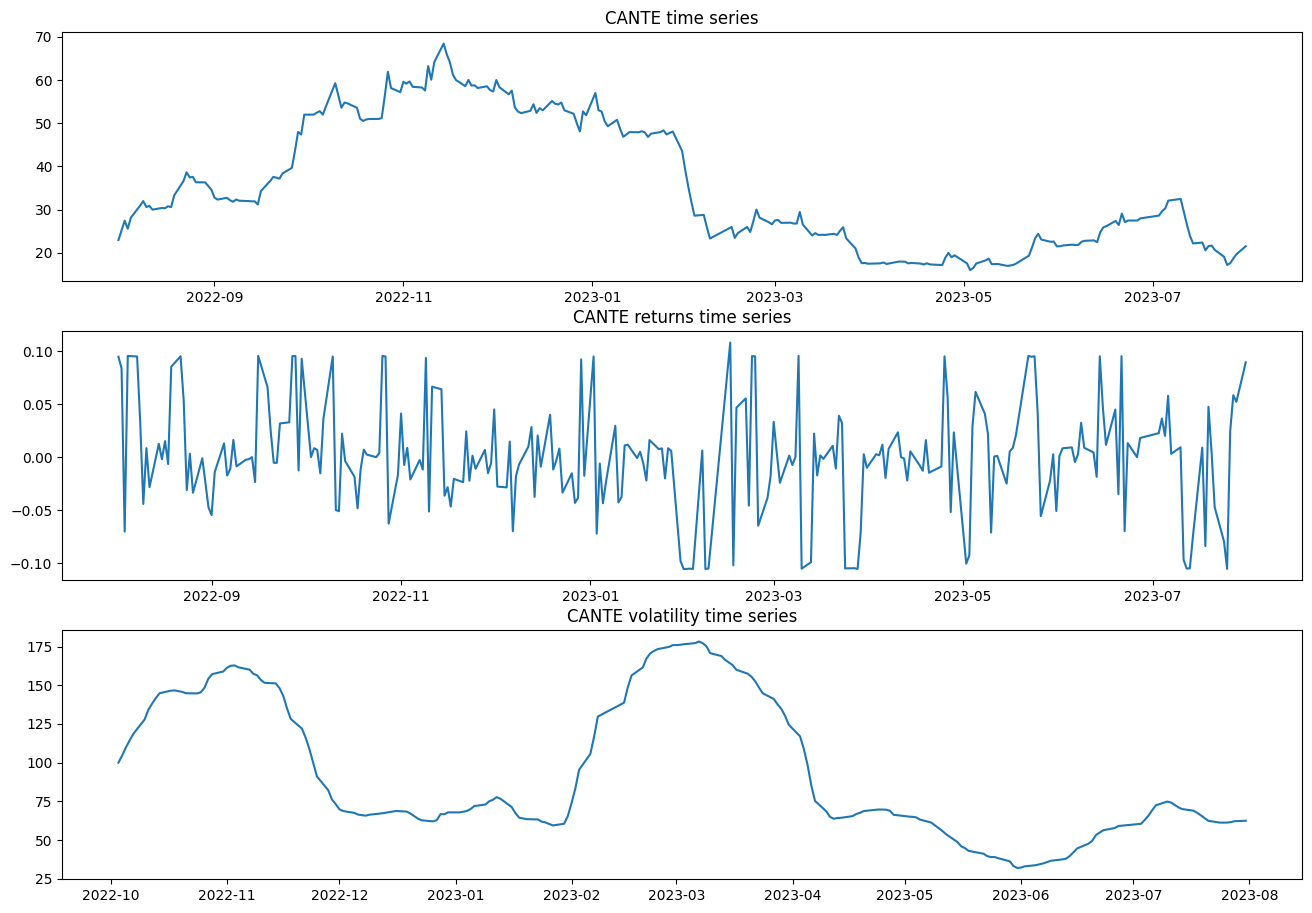

In [770]:
plt.subplot(3, 1, 1)
plt.plot(data_close)
plt.title(f"{Ticker} time series")

data_log_returns = data_close.pct_change().apply(lambda x: np.log(1+x))

plt.subplot(3, 1, 2)
plt.plot(data_log_returns)
plt.title(f"{Ticker} returns time series")

plt.subplot(3, 1, 3)
data_vlt = data_close.rolling(LOOKBACK).std()*(252**0.5)
plt.title(f"{Ticker} volatility time series")
plt.plot(data_vlt)

fig = plt.gcf()
fig.set_size_inches(16, 11)
plt.show()

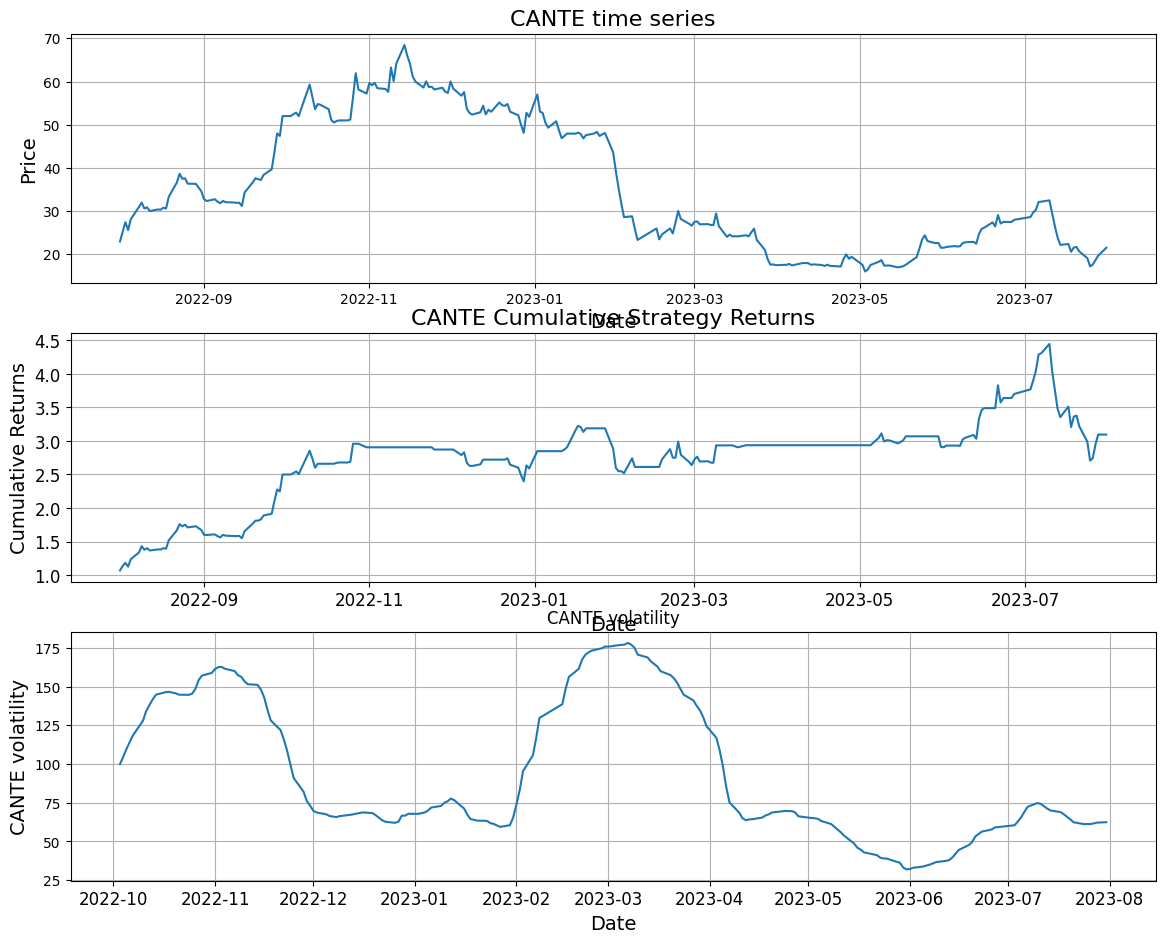

In [771]:
# Plot cumulative returns
plt.figure(figsize=(14,11))

plt.subplot(3, 1, 1)
plt.plot(data_close)
plt.title(f"{Ticker} time series", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid()

plt.subplot(3, 1, 2)
data['cumulative_strategy_returns'] = (data.strategy_returns+1).cumprod()
data['cumulative_strategy_returns'].fillna(method='ffill', inplace=True)

plt.plot(data.cumulative_strategy_returns)
plt.title(f"{Ticker} returns time series")
plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Cumulative strategy returns
# Define the label for the title of the figure
plt.title(f"{Ticker} Cumulative Strategy Returns", fontsize=16)
# Define the labels for x-axis and y-axis
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)

# Define the tick size for x-axis and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.subplot(3, 1, 3)
plt.xlabel('Date', fontsize=14)
plt.ylabel(f'{Ticker} volatility', fontsize=14)
plt.grid()
plt.xticks(fontsize=12)
plt.title(f"{Ticker} volatility")
plt.plot(data_vlt)


plt.show()

In [776]:
data.head(200)

,Open,High,Low,Close,Adj Close,Volume,Adj Open,returns,std,positions,strategy_returns,cumulative_strategy_returns
Date,,,,,,,,,,,,
2022-08-01,21.500000,22.980000,21.299999,22.980000,22.980000,1175915,21.500000,NaN,NaN,1.0,0.068837,1.068837
2022-08-02,23.780001,25.260000,23.700001,25.260000,25.260000,2677957,23.780001,0.034813,NaN,1.0,0.062237,1.135359
2022-08-03,26.360001,27.780001,25.120001,27.459999,27.459999,4893852,26.360001,0.043547,NaN,1.0,0.041730,1.182737
2022-08-04,26.879999,28.000000,25.580000,25.600000,25.600000,2506797,26.879999,-0.021122,NaN,1.0,-0.047619,1.126416
2022-08-05,25.639999,28.160000,25.639999,28.160000,28.160000,4147982,25.639999,0.001562,NaN,1.0,0.098284,1.237125
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-10,18.100000,18.540001,17.389999,17.400000,17.400000,3425685,18.100000,-0.031049,0.021887,1.0,-0.038674,2.992653
2023-05-11,17.299999,18.000000,16.930000,17.410000,17.410000,5280888,17.299999,-0.005747,0.021857,1.0,0.006358,3.011681
2023-05-12,17.450001,18.790001,17.150000,17.430000,17.430000,6111237,17.450001,0.002298,0.021872,1.0,-0.001146,3.008229


In [779]:
data.loc['2022-11-01':'2022-12-30']

,Open,High,Low,Close,Adj Close,Volume,Adj Open,returns,std,positions,strategy_returns,cumulative_strategy_returns
Date,,,,,,,,,,,,
2022-11-01,57.599998,60.360001,55.200001,59.599998,59.599998,1131347,57.599998,0.006993,0.009090,0.0,0.000000,2.905540
2022-11-02,59.599998,62.400002,57.119999,59.160000,59.160000,1149502,59.599998,0.000000,0.008812,0.0,-0.000000,2.905540
2022-11-03,59.160000,61.200001,57.959999,59.680000,59.680000,941992,59.160000,0.000000,0.008633,0.0,0.000000,2.905540
2022-11-04,59.639999,60.200001,58.400002,58.439999,58.439999,626217,59.639999,-0.000670,0.008403,0.0,-0.000000,2.905540
2022-11-07,58.439999,59.880001,57.080002,58.279999,58.279999,584740,58.439999,0.000000,0.008350,0.0,-0.000000,2.905540
2022-11-08,58.000000,58.840000,56.959999,57.599998,57.599998,445780,58.000000,-0.004804,0.008392,0.0,-0.000000,2.905540
2022-11-09,58.000000,63.360001,58.000000,63.240002,63.240002,1976265,58.000000,0.006944,0.008440,0.0,0.000000,2.905540
2022-11-10,62.400002,62.759998,59.360001,60.080002,60.080002,1223772,62.400002,-0.013283,0.008614,0.0,-0.000000,2.905540
2022-11-11,60.080002,65.480003,58.720001,64.199997,64.199997,2217552,60.080002,0.000000,0.008609,0.0,0.000000,2.905540


/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2022-08-01
End date,2023-07-31
Total months,11
,Backtest
Annual return,212.4%
Cumulative returns,209.5%
Annual volatility,57.1%
Sharpe ratio,2.28
Calmar ratio,5.43
Stability,0.60
Max drawdown,-39.1%


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


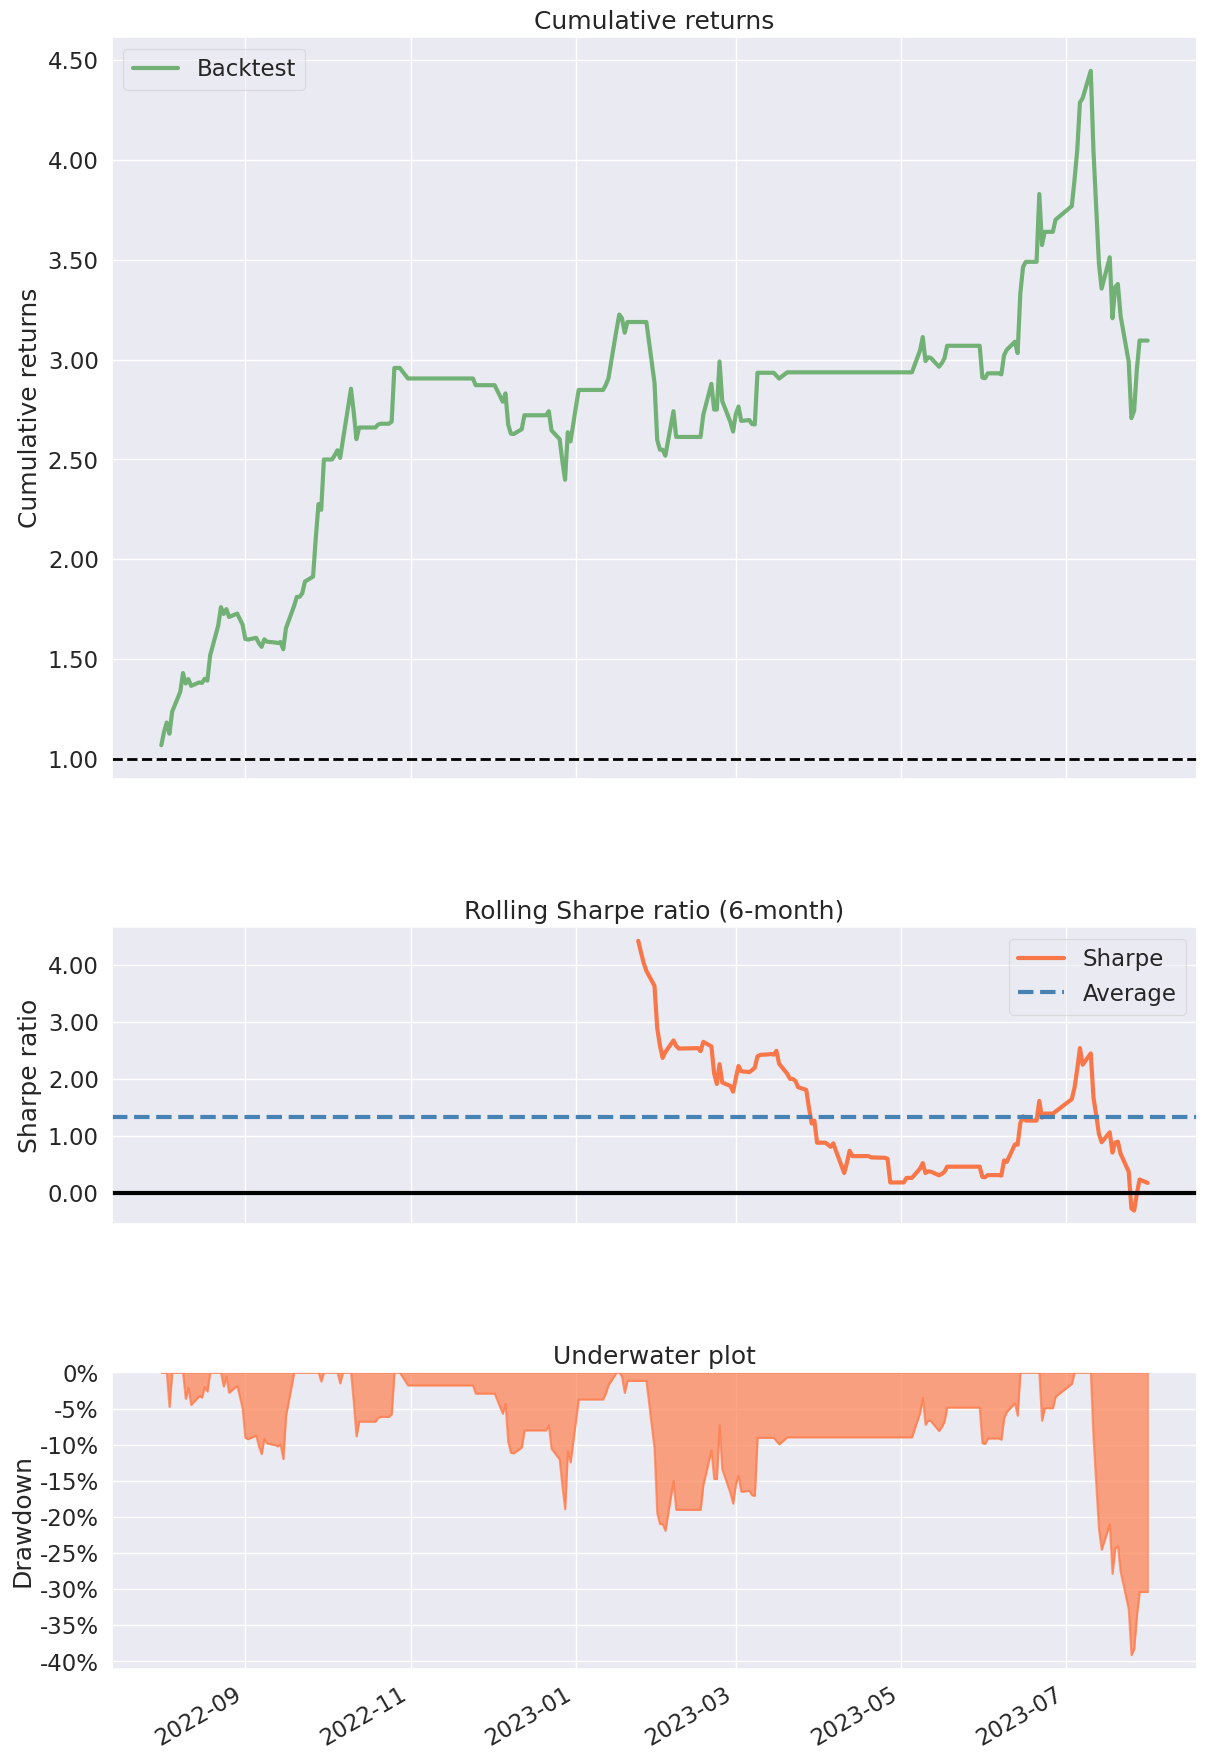

In [773]:
pyf.create_simple_tear_sheet(data.strategy_returns)

In [774]:
np.max(data.cumulative_strategy_returns)

4.446104864948519

In [775]:
(data.cumulative_strategy_returns[-1])

3.095484041794597